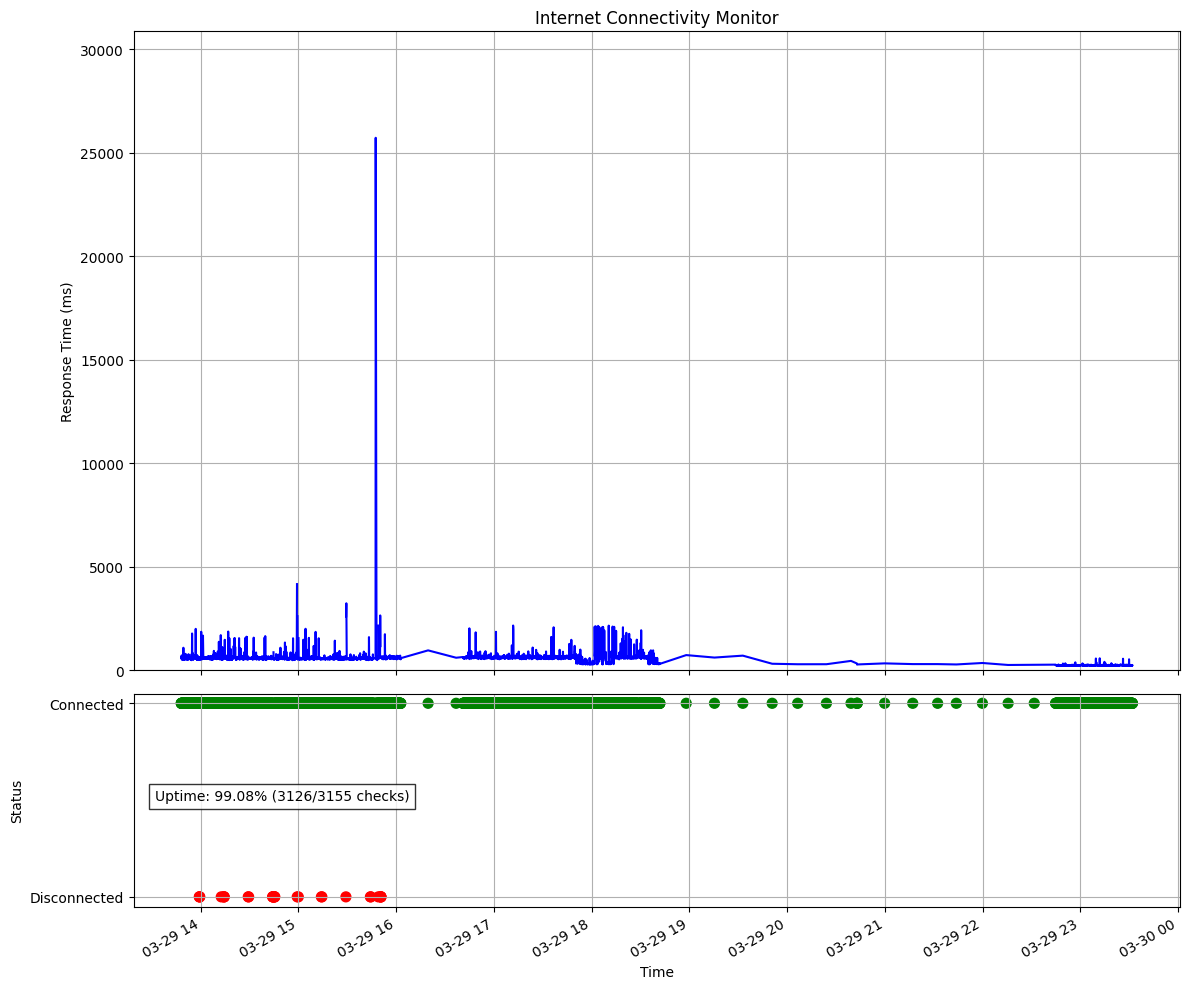

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import requests
import datetime
from IPython.display import clear_output

def monitor_internet_connectivity(interval=5, duration=None, target_url="https://www.google.com", timeout=3):
    """
    Monitor internet connectivity and plot the results in real-time.
    
    Parameters:
    -----------
    interval : int, optional
        Time between connectivity checks in seconds (default: 5)
    duration : int, optional
        Total monitoring duration in seconds (default: None, runs indefinitely)
    target_url : str, optional
        URL to ping for connectivity test (default: "https://www.google.com")
    timeout : int, optional
        Request timeout in seconds (default: 3)
    """
    # Initialize data storage
    timestamps = []
    response_times = []
    status = []
    
    # Setup the plot
    plt.figure(figsize=(12, 8))
    
    start_time = time.time()
    
    try:
        while True:
            current_time = datetime.datetime.now()
            timestamps.append(current_time)
            
            try:
                # Test connectivity
                start_request = time.time()
                response = requests.get(target_url, timeout=timeout)
                end_request = time.time()
                
                # Record response time in milliseconds
                resp_time = (end_request - start_request) * 1000
                response_times.append(resp_time)
                
                # Record status
                status.append(1)  # 1 means connected
                
                print(f"Connected: {current_time.strftime('%H:%M:%S')} - Response time: {resp_time:.2f} ms")
                
            except requests.exceptions.RequestException:
                # If connection fails
                response_times.append(np.nan)  # Use NaN for plotting disconnected state
                status.append(0)  # 0 means disconnected
                
                print(f"Disconnected: {current_time.strftime('%H:%M:%S')}")
            
            # Create DataFrame for easier plotting
            data = pd.DataFrame({
                'Timestamp': timestamps,
                'ResponseTime': response_times,
                'Status': status
            })
            
            # Update the plot
            clear_output(wait=True)
            
            # Create figure with two subplots
            fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), gridspec_kw={'height_ratios': [3, 1]})
            
            # Plot response times
            ax1.plot(data['Timestamp'], data['ResponseTime'], 'b-', label='Response Time')
            ax1.set_ylabel('Response Time (ms)')
            ax1.set_title('Internet Connectivity Monitor')
            ax1.grid(True)
            
            # Set y-axis limit with some padding
            if not np.all(np.isnan(data['ResponseTime'])):
                max_resp = np.nanmax(data['ResponseTime'])
                ax1.set_ylim(0, max_resp * 1.2)
            
            # Format x-axis 
            plt.gcf().autofmt_xdate()
            
            # Create status plot (uptime/downtime)
            cmap = {0: 'red', 1: 'green'}
            ax2.scatter(data['Timestamp'], data['Status'], c=data['Status'].map(cmap), s=50)
            ax2.set_yticks([0, 1])
            ax2.set_yticklabels(['Disconnected', 'Connected'])
            ax2.set_ylabel('Status')
            ax2.set_xlabel('Time')
            ax2.grid(True)
            
            # Calculate uptime percentage
            uptime_pct = (data['Status'].sum() / len(data['Status'])) * 100
            total_checks = len(data['Status'])
            uptime_text = f"Uptime: {uptime_pct:.2f}% ({data['Status'].sum()}/{total_checks} checks)"
            
            # Add uptime stats
            ax2.text(0.02, 0.5, uptime_text, transform=ax2.transAxes, bbox=dict(facecolor='white', alpha=0.8))
            
            plt.tight_layout()
            plt.show()
            
            # Check if duration is specified and if we've exceeded it
            if duration and (time.time() - start_time) > duration:
                print(f"Monitoring completed after {duration} seconds.")
                break
            
            # Wait for the specified interval
            time.sleep(interval)
            
    except KeyboardInterrupt:
        print("Monitoring stopped by user.")
    
    return data

# Example usage
# To run indefinitely with checks every 5 seconds:
connectivity_data = monitor_internet_connectivity(interval=5)

# To run for a specific duration (e.g., 10 minutes = 600 seconds) with checks every 2 seconds:
# connectivity_data = monitor_internet_connectivity(interval=2, duration=600)